# Single Label Multiclass Classification

In [10]:
# imports
from keras.datasets import reuters
from keras import models, layers
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

import numpy as np

In [3]:
# laoding data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
# encoding data

## categorization function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
## data
enc_test_data = vectorize_sequences(test_data)
enc_train_data = vectorize_sequences(train_data)

## labels
enc_train_labels = to_categorical(train_labels)
enc_test_labels = to_categorical(test_labels)  

In [6]:
# model definition

## define model
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## compile model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# splitting validation data

x_val = enc_train_data[:1000]
partial_x_train = enc_train_data[1000:]

y_val = enc_train_labels[:1000]
partial_y_train = enc_train_labels[1000:]

In [8]:
# fitting the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 2.6667 - accuracy: 0.5129 - val_loss: 1.8296 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 1.5510 - accuracy: 0.6709 - val_loss: 1.3774 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.2001 - accuracy: 0.7399 - val_loss: 1.1885 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.9876 - accuracy: 0.7938 - val_loss: 1.0833 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8241 - accuracy: 0.8226 - val_loss: 1.0263 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6919 - accuracy: 0.8518 - val_loss: 0.9420 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5795 - accuracy: 0.8740 - val_loss: 0.9169 - val_accuracy: 0.8080
Epoch 8/20
16

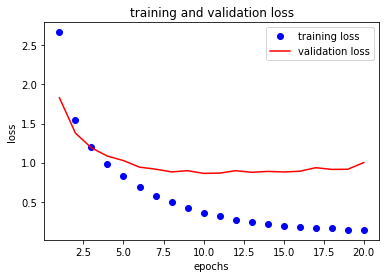

In [13]:
# plotting performance

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 20 + 1)

plt.figure(facecolor='white')
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()